In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

### Import data

In [3]:
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.shape

(1030, 9)

In [11]:
print(df.isnull().sum())
print("\nNo missing values")

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

No missing values


In [12]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [13]:
# Few columns do have 0

### Split x and y

In [17]:
x = df.drop(columns=['Strength'])
y = df[['Strength']]


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Lets try without any transformation

In [23]:
lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

r2_score(y_test, y_pred) * 100

62.7553179231485

In [25]:
# Cross validation
lr = LinearRegression()

print(np.mean(cross_val_score(lr, x, y, scoring='r2')) * 100)

46.09940491662861


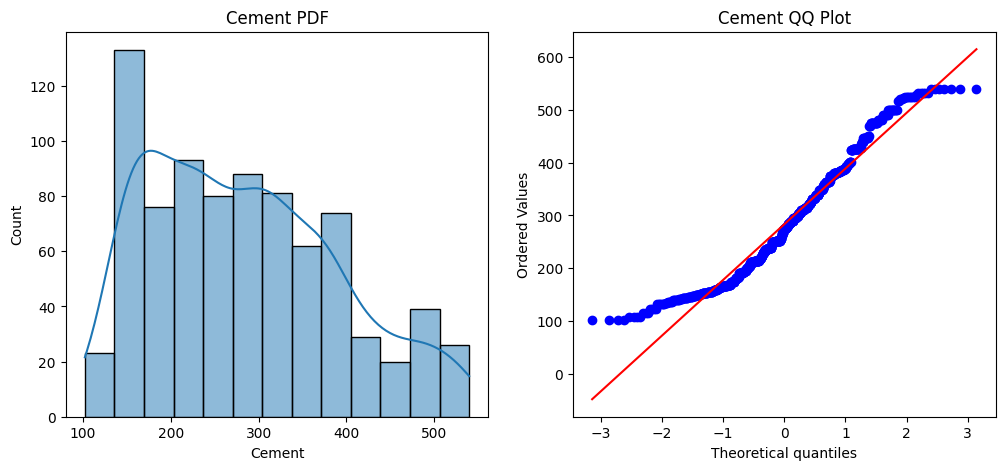

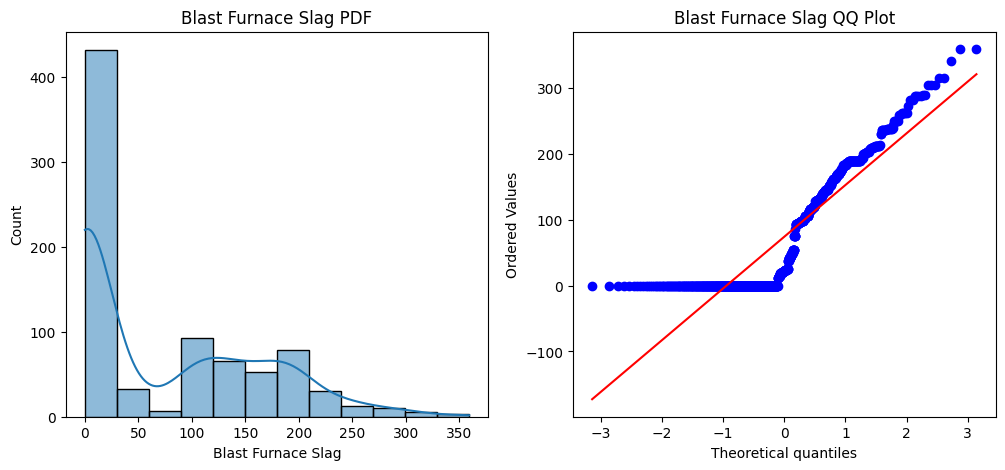

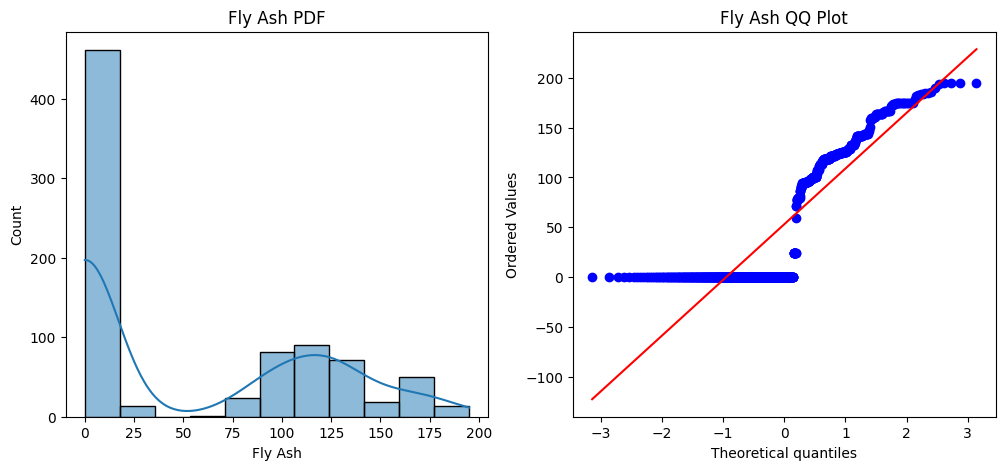

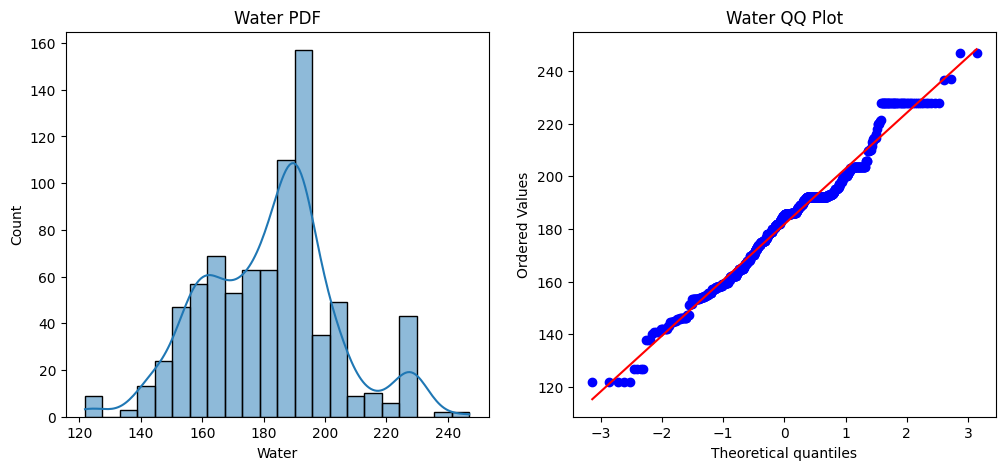

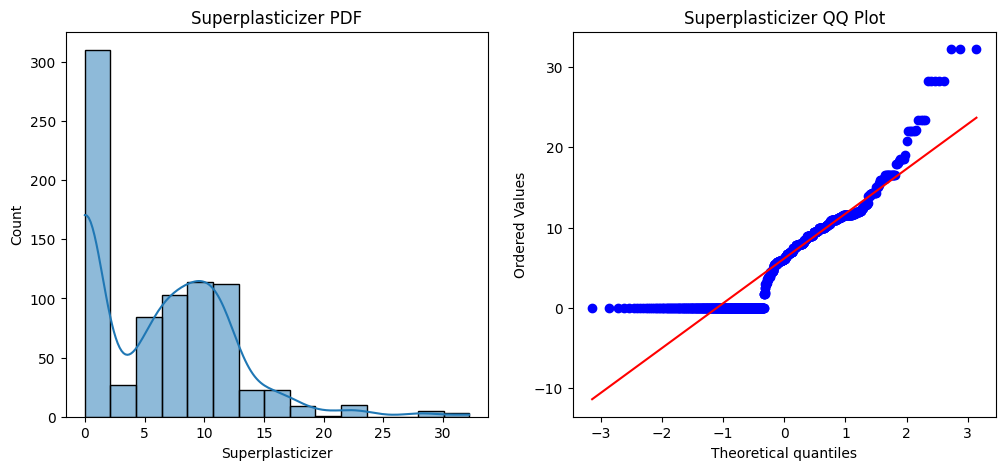

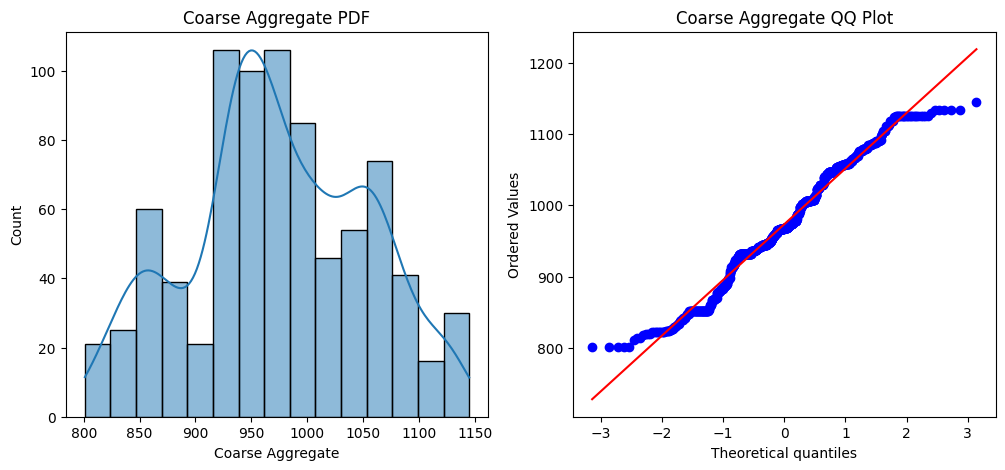

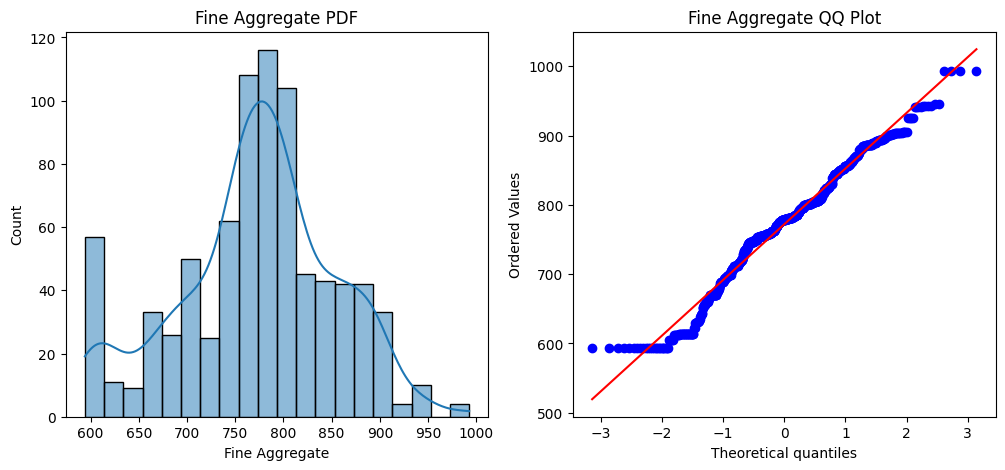

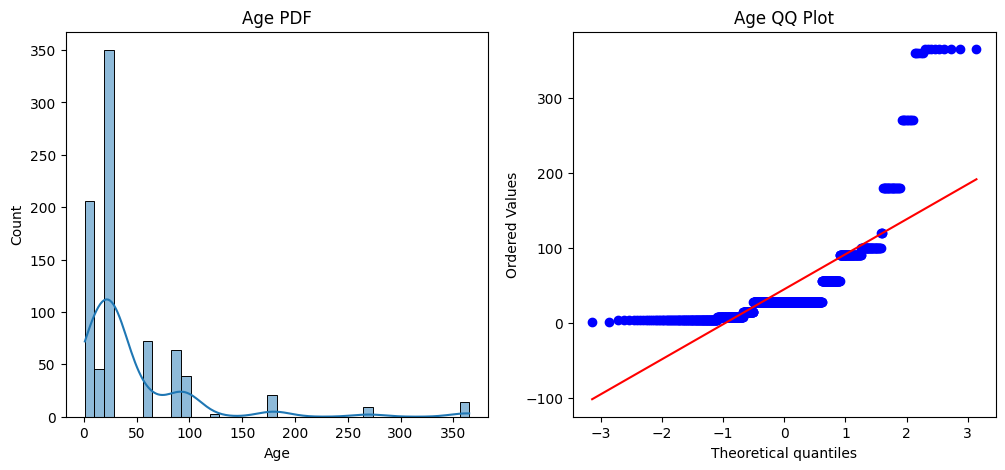

In [26]:
# Plot all distplots without transformation

for col in x_train.columns:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(x_train[col], kde=True)
    plt.title(f"{col} PDF")
    
    plt.subplot(1, 2, 2)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(f"{col} QQ Plot")
    
    plt.show()

### Now applying Box-Cox transform

In [27]:
pt = PowerTransformer(method='box-cox')

x_train_transformed = pt.fit_transform(x_train + 0.00001) # Add 0.0001 to avoid 0s in data
x_test_transformed = pt.transform(x_test + 0.00001)


pd.DataFrame({'Columns': x_train.columns, 'BoxCox_Lambdas': pt.lambdas_})

,Columns,BoxCox_Lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.027842
2,Fly Ash,-0.044554
3,Water,0.772682
4,Superplasticizer,0.113892
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066630


In [28]:
# Applying Linear Regression again
lr = LinearRegression()

lr.fit(x_train_transformed, y_train)

y_pred2 = lr.predict(x_test_transformed)

print(r2_score(y_pred2, y_test) * 100)

76.29312456149093


In [30]:
# Using cross validation
lr = LinearRegression()
print(np.mean(cross_val_score(lr, x_train_transformed, y_train, scoring='r2', cv=10)) * 100)

79.16132325813165


### Plots before and after transformation

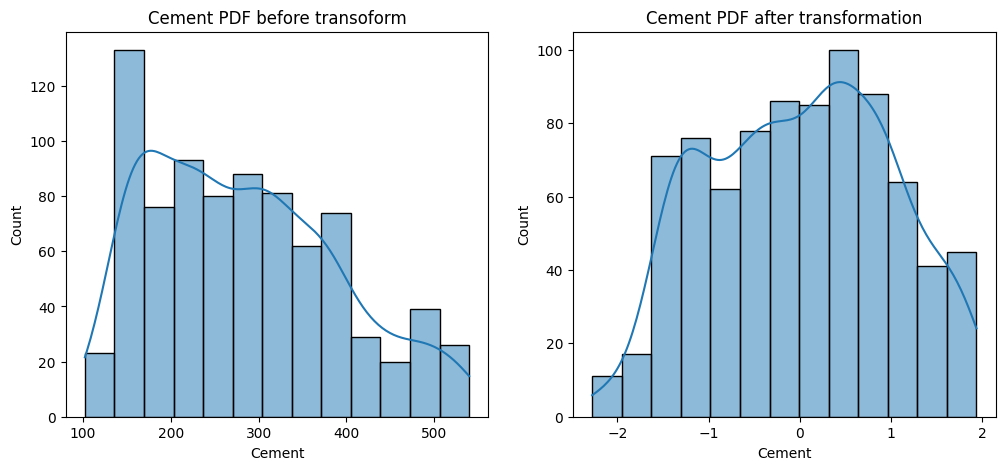

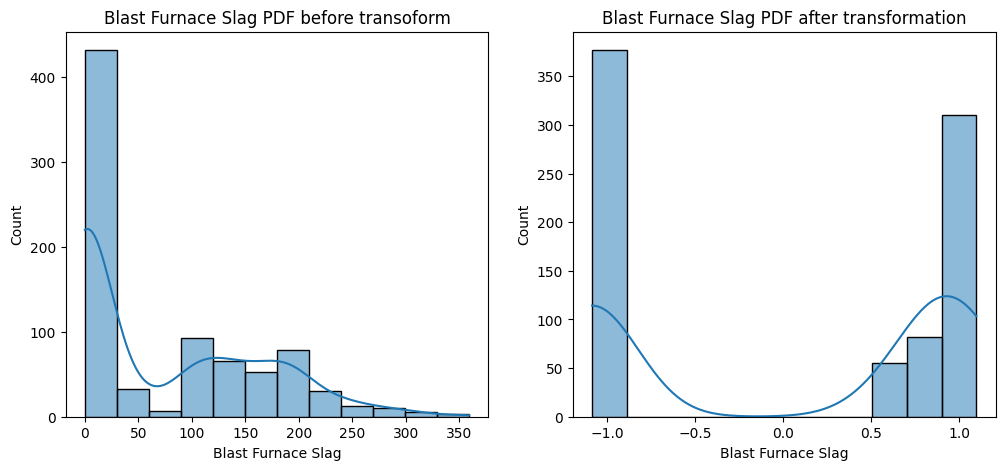

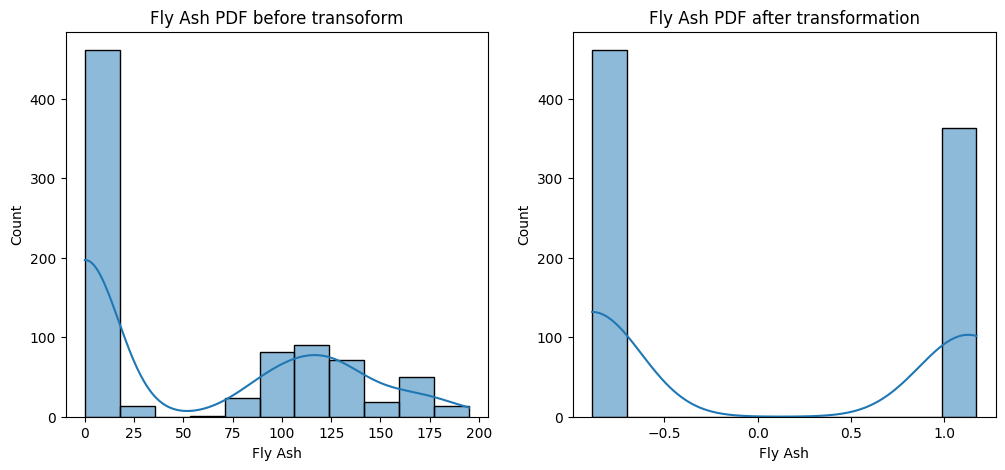

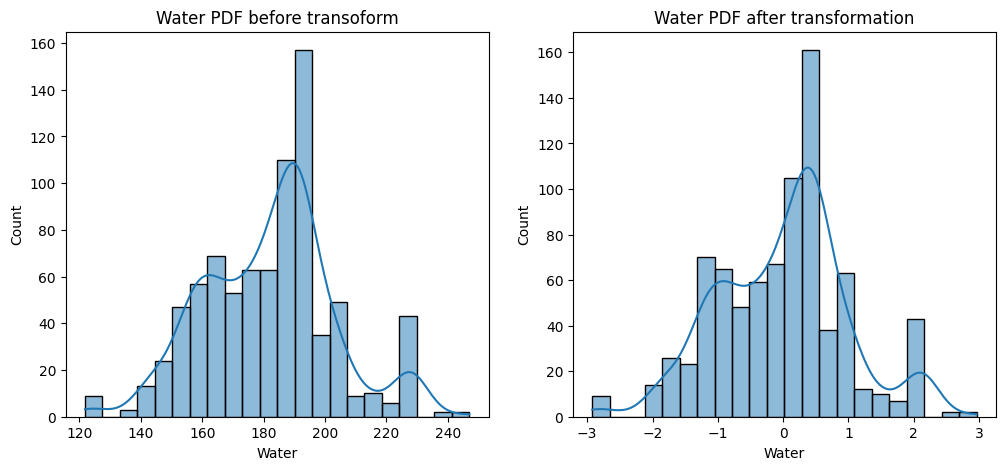

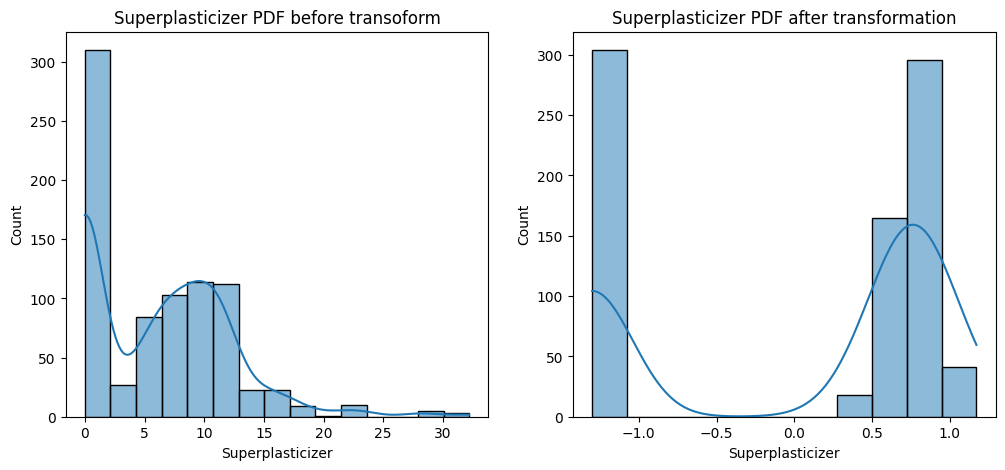

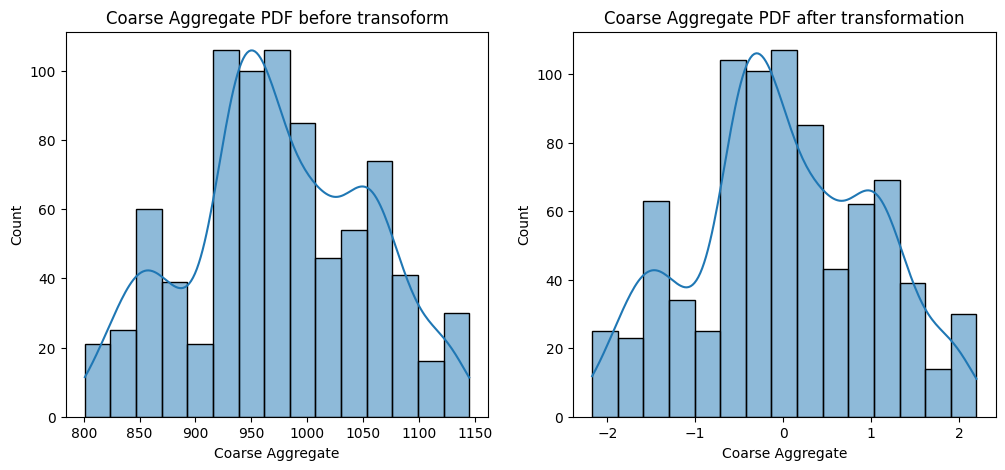

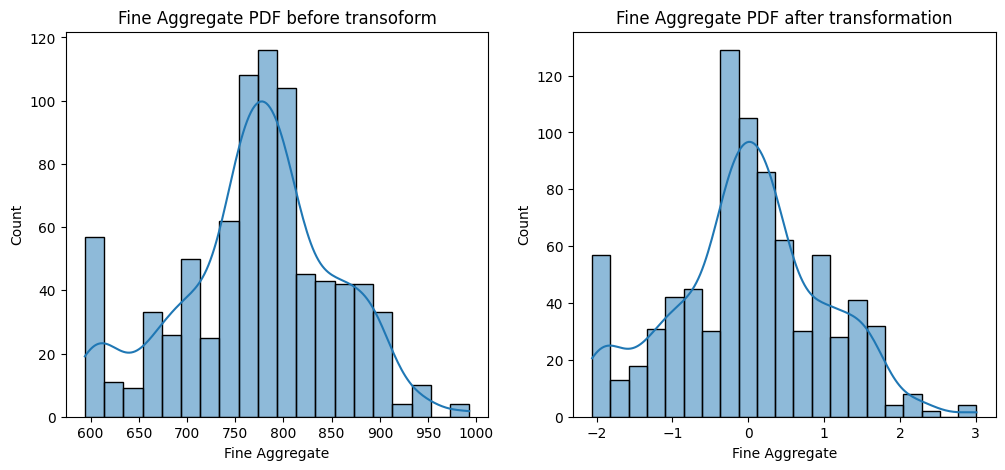

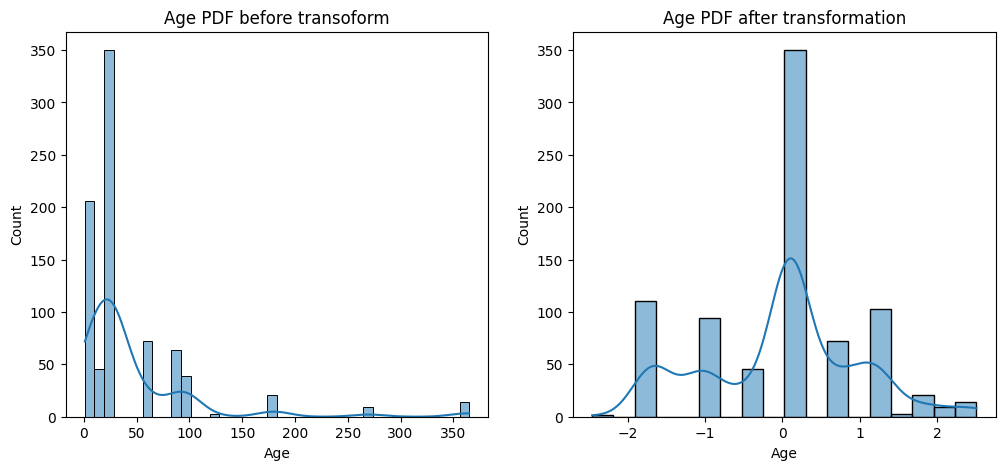

In [36]:
x_train_transformed_df = pd.DataFrame(x_train_transformed, columns=x_train.columns)

for col in x_train_transformed_df.columns:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(x_train[col], kde=True)
    plt.title(f"{col} PDF before transoform")

    plt.subplot(1, 2, 2)
    sns.histplot(x_train_transformed_df[col], kde=True)
    plt.title(f"{col} PDF after transformation")

    plt.show()